# Predict CTR of an Email Campaign

Problem Statement 🧠
1. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.
2. Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the       Click Through Rate (CTR).
3. CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.
4. CTR depends on multiple factors like design, content, personalization, etc.
5. As a part of the Data Science team, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data = pd.read_csv('train_F3fUq2S.csv', index_col='campaign_id')
data.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,0,10,0.700000
3,3,59,12801,16,5,1,Noon,2,11,3,...,1,0,1,0,0,0,0,0,16,0.002769
4,3,74,11037,30,4,0,Evening,15,9,4,...,0,0,0,0,0,0,0,0,10,0.010868
5,3,80,10011,27,5,1,Noon,6,26,3,...,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 1 to 1888
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   object 
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_timer            1888 non-null   int64  
 15  is_emoticons        1888 non-null   int64  
 16  is_dis

In [4]:
# Missing Value Check
data.isnull().sum()

sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

* Dataset have no missing value so i can go for EDA

In [5]:
# Dataset Shape Check
data.shape

(1888, 21)

<AxesSubplot:xlabel='click_rate', ylabel='subject_len'>

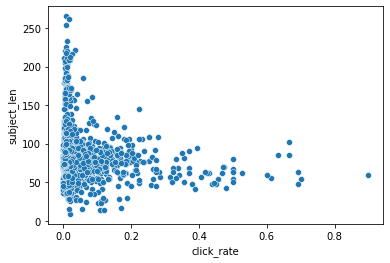

In [6]:
# Relationship checked of Subject_len vs Click_rate using scatterplot
sns.scatterplot(x='click_rate',y='subject_len',data=data)

<AxesSubplot:xlabel='click_rate', ylabel='body_len'>

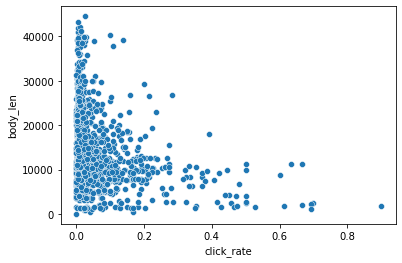

In [7]:
# Relationship checked of Body_len vs Click_rate using scatterplot
sns.scatterplot(x='click_rate',y='body_len',data=data)

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

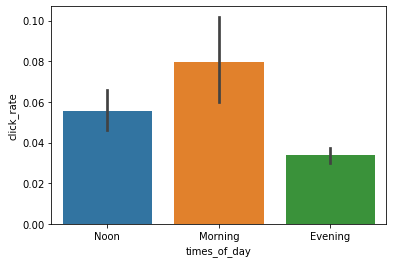

In [8]:
# Find out which times of day have highest click rate
sns.barplot(x='times_of_day',y='click_rate',data=data)

<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

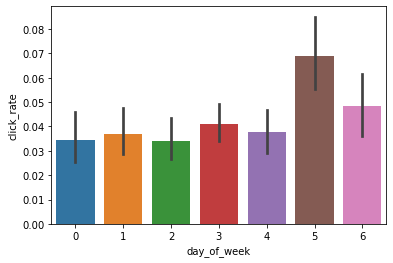

In [9]:
# Find out which day of week have highest click rate
sns.barplot(x='day_of_week',y='click_rate',data=data)

<AxesSubplot:xlabel='category', ylabel='click_rate'>

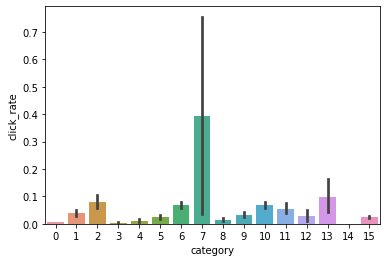

In [10]:
# Find out which products have highest click rate
sns.barplot(x='category',y='click_rate',data=data)

<AxesSubplot:xlabel='click_rate', ylabel='no_of_CTA'>

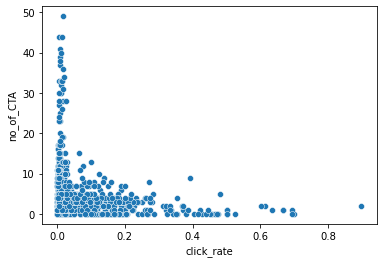

In [11]:
# Relationship checked of CTA vs Click_rate using scatterplot
sns.scatterplot(x='click_rate',y='no_of_CTA',data=data)

<AxesSubplot:xlabel='click_rate', ylabel='mean_CTA_len'>

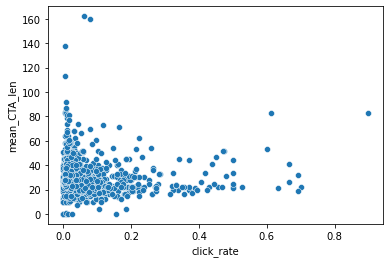

In [12]:
# Relationship checked of Mean of CTA vs Click_rate using scatterplot
sns.scatterplot(x='click_rate',y='mean_CTA_len',data=data)

### Handling with Categorical Variable 

In [13]:
times_new = pd.get_dummies(data['times_of_day'])

In [14]:
data = pd.concat([data,times_new],axis=1)

In [15]:
data.head(10)

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Evening,Morning,Noon
campaign_id,,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,14,0.103079,0,0,1
2,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,10,0.700000,0,1,0
3,3,59,12801,16,5,1,Noon,2,11,3,...,0,0,0,0,0,16,0.002769,0,0,1
4,3,74,11037,30,4,0,Evening,15,9,4,...,0,0,0,0,0,10,0.010868,1,0,0
5,3,80,10011,27,5,1,Noon,6,26,3,...,0,0,0,0,0,14,0.142826,0,0,1
6,3,54,2569,256,4,0,Evening,2,11,0,...,0,0,0,0,0,10,0.500000,1,0,0
7,3,54,2570,256,4,0,Evening,2,11,0,...,0,0,0,0,0,10,0.457143,1,0,0
8,3,60,12117,17,4,0,Noon,6,26,4,...,0,0,0,0,0,14,0.166998,0,0,1
9,3,89,10055,14,4,0,Noon,6,26,3,...,0,0,0,0,0,13,0.029233,0,0,1


In [16]:
data.drop(['times_of_day'],axis=1,inplace=True)

In [17]:
data.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Evening,Morning,Noon
campaign_id,,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,6,26,3,29,...,0,0,0,0,0,14,0.103079,0,0,1
2,3,54,2570,256,5,1,2,11,0,22,...,0,0,0,0,0,10,0.700000,0,1,0
3,3,59,12801,16,5,1,2,11,3,23,...,0,0,0,0,0,16,0.002769,0,0,1
4,3,74,11037,30,4,0,15,9,4,24,...,0,0,0,0,0,10,0.010868,1,0,0
5,3,80,10011,27,5,1,6,26,3,31,...,0,0,0,0,0,14,0.142826,0,0,1


<AxesSubplot:>

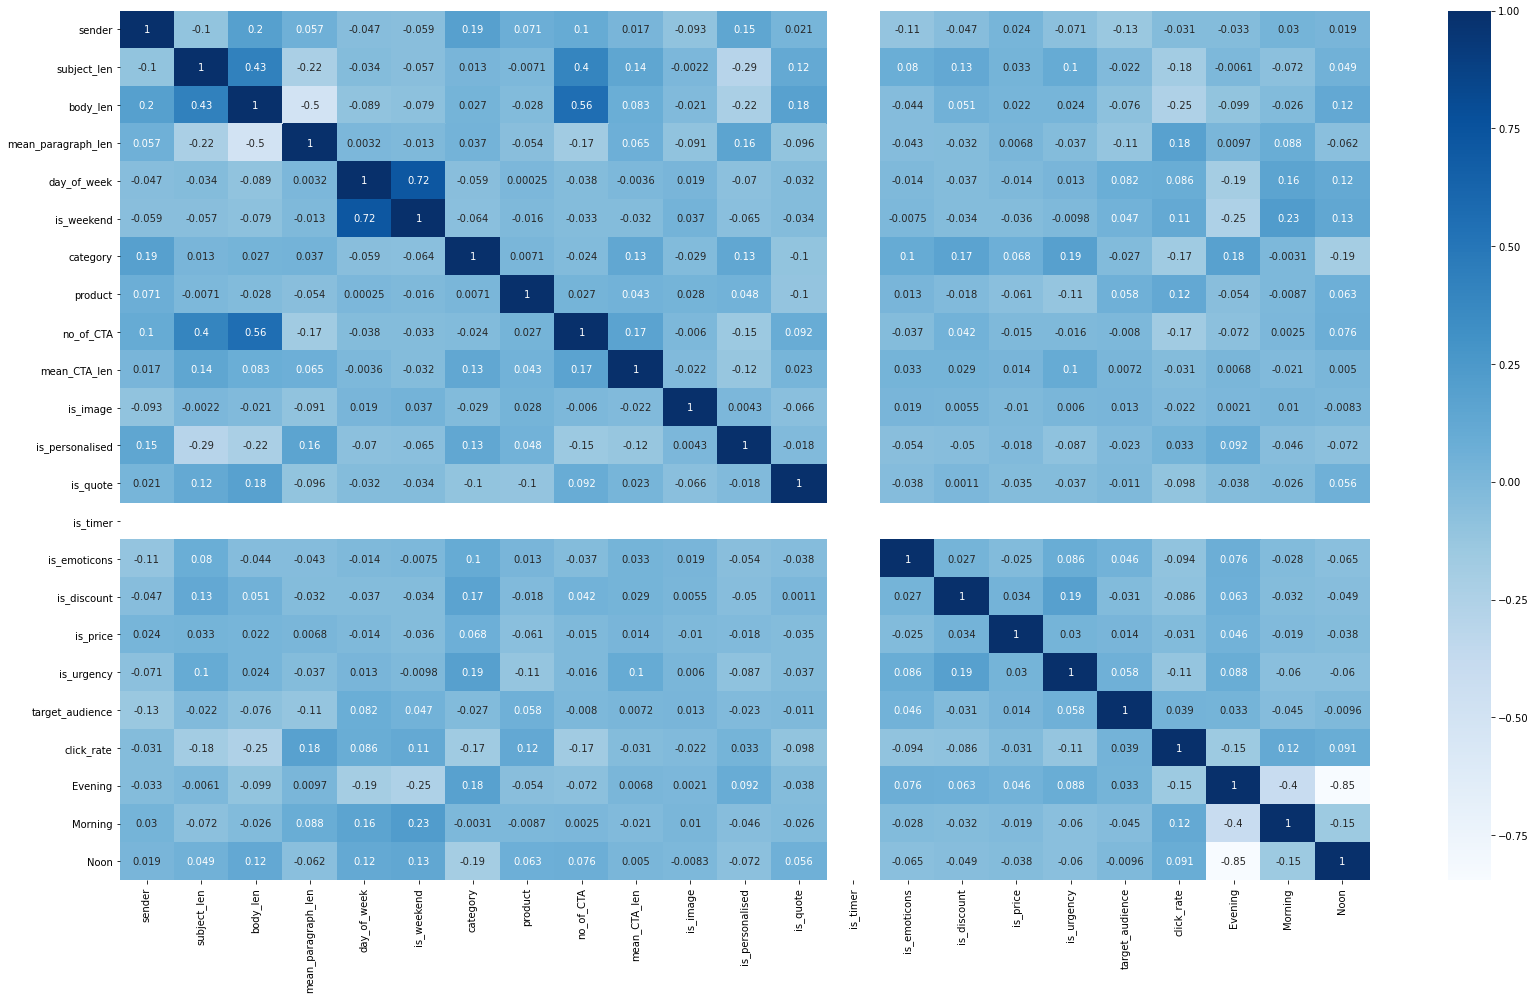

In [18]:
# Co-relation matrix

plt.figure(figsize=(28,16))

sns.heatmap(data.corr(),annot = True, cmap='Blues' )

### Model Building

In [19]:
from pycaret import regression

In [20]:
model_setup=regression.setup(data=data,target='click_rate',use_gpu = True)

,Description,Value
0,session_id,8000
1,Target,click_rate
2,Original Data,"(1888, 23)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1321, 90)"


In [21]:
best=regression.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0290,0.0037,0.0580,0.5022,0.0485,2.4001,0.9920
rf,Random Forest Regressor,0.0303,0.0039,0.0602,0.4633,0.0501,2.5074,1.0120
lightgbm,Light Gradient Boosting Machine,0.0333,0.0042,0.0629,0.4111,0.0522,2.4653,1.4800
gbr,Gradient Boosting Regressor,0.0330,0.0044,0.0635,0.4067,0.0530,2.6445,0.3040
br,Bayesian Ridge,0.0445,0.0061,0.0767,0.1644,0.0635,4.2179,0.0340
ridge,Ridge Regression,0.0453,0.0063,0.0778,0.1421,0.0644,4.3238,0.0130
omp,Orthogonal Matching Pursuit,0.0441,0.0063,0.0781,0.1351,0.0647,3.9970,0.0120
lr,Linear Regression,0.0460,0.0065,0.0784,0.1327,0.0648,4.4151,0.0190
knn,K Neighbors Regressor,0.0413,0.0059,0.0764,0.1282,0.0647,3.6319,0.4660
lasso,Lasso Regression,0.0476,0.0070,0.0819,0.0470,0.0683,4.9474,0.0130


In [22]:
et=regression.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0263,0.0023,0.0484,0.4889,0.0424,1.9349
1,0.0412,0.0095,0.0977,0.2554,0.0744,2.5481
2,0.0294,0.0036,0.0601,0.3382,0.0501,2.8819
3,0.0299,0.0030,0.0552,0.6073,0.0470,2.6870
4,0.0259,0.0024,0.0494,0.7637,0.0406,1.8143
5,0.0323,0.0033,0.0573,0.3028,0.0508,4.7280
6,0.0189,0.0010,0.0319,0.8299,0.0278,1.6281
7,0.0264,0.0021,0.0458,0.5139,0.0412,2.1402
8,0.0306,0.0033,0.0572,0.4285,0.0498,1.3800


In [23]:
regression.evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
final_et = regression.finalize_model(et)

In [25]:
# Test Dataset import
df_test=pd.read_csv('test_Bk2wfZ3.csv', index_col='campaign_id')

In [26]:
df_test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
campaign_id,,,,,,,,,,,,,,,,,,,,
1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 1889 to 2650
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sender              762 non-null    int64 
 1   subject_len         762 non-null    int64 
 2   body_len            762 non-null    int64 
 3   mean_paragraph_len  762 non-null    int64 
 4   day_of_week         762 non-null    int64 
 5   is_weekend          762 non-null    int64 
 6   times_of_day        762 non-null    object
 7   category            762 non-null    int64 
 8   product             762 non-null    int64 
 9   no_of_CTA           762 non-null    int64 
 10  mean_CTA_len        762 non-null    int64 
 11  is_image            762 non-null    int64 
 12  is_personalised     762 non-null    int64 
 13  is_quote            762 non-null    int64 
 14  is_timer            762 non-null    int64 
 15  is_emoticons        762 non-null    int64 
 16  is_discount         76

In [28]:
# Handling with categorical variable
times_new2 = pd.get_dummies(df_test['times_of_day'])

In [29]:
df_test=pd.concat([df_test,times_new2],axis=1)

In [30]:
df_test.drop(['times_of_day'],axis=1,inplace=True)

In [31]:
unseen_predictions = regression.predict_model(final_et, data=df_test)
unseen_predictions.head(10)

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,Evening,Morning,Noon,Label
campaign_id,,,,,,,,,,,,,,,,,,,,,
1889,3,61,12871,11,6,1,6,26,3,37,...,0,1,0,0,0,14,0,0,1,0.110167
1890,3,54,2569,256,5,1,2,11,0,22,...,0,0,0,0,0,10,0,1,0,0.700000
1891,3,88,1473,78,4,0,2,11,0,22,...,0,0,0,0,0,10,1,0,0,0.201881
1892,3,88,1473,78,3,0,2,11,0,22,...,0,0,0,0,0,10,1,0,0,0.265459
1893,3,78,9020,29,3,0,6,26,2,40,...,0,0,0,0,0,14,0,0,1,0.148208
1894,3,99,14983,15,3,0,6,26,4,34,...,0,0,0,0,0,5,0,0,1,0.023075
1895,3,104,9183,32,1,0,15,9,3,27,...,0,0,0,0,0,16,1,0,0,0.007196
1896,3,86,14787,19,0,0,2,11,9,29,...,0,0,0,0,0,1,1,0,0,0.013066
1897,3,64,12801,16,4,0,2,11,3,23,...,0,0,0,0,0,16,1,0,0,0.005240


In [32]:
sample_submission=unseen_predictions['Label']

In [33]:
sample_submission.head()

campaign_id
1889    0.110167
1890    0.700000
1891    0.201881
1892    0.265459
1893    0.148208
Name: Label, dtype: float64

In [36]:
sample_submission.to_csv('Sample_submission_for_ML_Hackthon.csv')

# Thank You....